In [1]:
import pandas as pandas
import numpy as np

# Loading data

In [2]:
# load 'test.xlsx'

df_test = pandas.read_excel('test.xlsx', sheet_name='data', header=None)

df_test

,0,1,2
0,Community,Community Name,Braybrook (Suburb)
1,Community,Region,Northern and Western Metropolitan
2,Geography,Map reference,4
3,Geography,Grid reference,A3
4,Geography,Location,10km WNW of Melbourne
...,...,...,...
221,Hospital,Distance to nearest public hospital with emerg...,10.161988
222,Hospital,Presentations to emergency departments due to ...,543.631989
223,Hospital,Presentations to emergency departments due to ...,20.647263
224,Hospital,Category 4 & 5 emergency department presentations,1683.966712


In [3]:
# set the first column as reference
ref_col = df_test.iloc[:, 0]

In [4]:
def excel_loader(xlsx_path, sheet_name='data', ref_col=ref_col):
    # load the excel file
    df = pandas.read_excel(xlsx_path, sheet_name=sheet_name, header=None)
    # replace the first column with the reference column
    df.iloc[:, 0] = ref_col
    # change the column names
    df.columns = ['feature_kind', 'feature_name', 'feature_value']
    return df



In [5]:
excel_loader('data/Ascot-Vale-Suburb - XLSX.xlsx')

,feature_kind,feature_name,feature_value
0,Community,Community Name,Ascot Vale (Suburb)
1,Community,Region,Northern and Western Metropolitan
2,Geography,Map reference,4
3,Geography,Grid reference,B3
4,Geography,Location,6km NW of Melbourne
...,...,...,...
221,Hospital,Distance to nearest public hospital with emerg...,4.993841
222,Hospital,Presentations to emergency departments due to ...,679.257076
223,Hospital,Presentations to emergency departments due to ...,20.502456
224,Hospital,Category 4 & 5 emergency department presentations,1864.918123


In [6]:
import os

dataset_list=['data/'+f for f in os.listdir('data') if f.endswith('.xlsx')]
df_all=[excel_loader(f) for f in dataset_list]
df_all

[    feature_kind                                       feature_name  \
 0      Community                                     Community Name   
 1      Community                                             Region   
 2      Geography                                      Map reference   
 3      Geography                                     Grid reference   
 4      Geography                                           Location   
 ..           ...                                                ...   
 221     Hospital  Distance to nearest public hospital with emerg...   
 222     Hospital  Presentations to emergency departments due to ...   
 223     Hospital  Presentations to emergency departments due to ...   
 224     Hospital  Category 4 & 5 emergency department presentations   
 225     Hospital  Category 4 & 5 emergency department presentati...   
 
                          feature_value  
 0                  Ascot Vale (Suburb)  
 1    Northern and Western Metropolitan  
 2      

In [7]:
# count the columns for each dataset
df_all_count = [df.shape[0] for df in df_all]
# check if all the datasets have the same number of columns
all(x == df_all_count[0] for x in df_all_count)

True

# Check for missing vals

In [8]:
# check for missing values in any of the datasets
missing_values = [df.isnull().values.any() for df in df_all]
# print the index of the dataset with missing values
dfs_with_na=[i for i, x in enumerate(missing_values) if x]
dfs_with_na

[8, 9, 22, 26, 29, 30, 31, 32]

In [9]:
for i in dfs_with_na:
    print(dataset_list[i])

data/Malvern-Suburb - XLSX.xlsx
data/Melbourne-Airport-Suburb - XLSX.xlsx
data/Sorrento-Suburb - XLSX.xlsx
data/St-Andrews-Beach-Suburb - XLSX.xlsx
data/St-Kilda-West-Suburb - XLSX.xlsx
data/Toorak-Suburb - XLSX.xlsx
data/Tyabb-Suburb - XLSX.xlsx
data/Waterways-Suburb - XLSX.xlsx


In [10]:
# write utility function to get the index and the feature_category, feature_name, feature_value of the missing values for a given dataset

def get_missing_values(df):
    # get the index of the missing values
    missing_values_index = df[df.isnull().any(axis=1)].index
    # get the feature_category, feature_name, feature_value of the missing values
    missing_values = df.iloc[missing_values_index]
    return missing_values

In [11]:
affected_details = [get_missing_values(df_all[i]) for i in dfs_with_na]

In [12]:
affected_rows_count=[df.shape[0] for df in affected_details]
affected_rows_count

[1, 52, 5, 8, 1, 1, 1, 5]

**NOTE:** Airport suburb has too much missing vals. 

In [13]:
for i in range(len(dfs_with_na)):
    # print(dataset_list[dfs_with_na[i]])
    if i!=1: print(affected_details[i])

    feature_kind                             feature_name feature_value
171    Diversity  Aboriginal or Torres Strait Islander, %           NaN
          feature_kind                             feature_name feature_value
120  Socio-demographic     % dwellings which are public housing           NaN
133  Socio-demographic      Male-headed lone parent families, %           NaN
171          Diversity  Aboriginal or Torres Strait Islander, %           NaN
179          Diversity              Poor English proficiency, %           NaN
209          Diversity               5th top language spoken, %           NaN
          feature_kind                             feature_name feature_value
120  Socio-demographic     % dwellings which are public housing           NaN
122  Socio-demographic       Dwellings with no motor vehicle, %           NaN
153  Socio-demographic              Aged 75+ and lives alone, %           NaN
171          Diversity  Aboriginal or Torres Strait Islander, %           Na

In [14]:
# figure out which feature category is missing across the affected datasets
missing_feature_categories = [df['feature_kind'].unique() for df in affected_details]
missing_feature_names = [df['feature_name'].unique() for df in affected_details]

missing_feature_names[:1]+missing_feature_categories[2:]

[array(['Aboriginal or Torres Strait Islander, %'], dtype=object),
 array(['Socio-demographic', 'Diversity'], dtype=object),
 array(['Socio-demographic', 'Diversity'], dtype=object),
 array(['Diversity'], dtype=object),
 array(['Socio-demographic'], dtype=object),
 array(['Socio-demographic'], dtype=object),
 array(['2007-2012 population change', 'Socio-demographic', 'Diversity'],
       dtype=object)]

# Attempt with geographic locations

In [15]:
from geopy.distance import geodesic
from geopy.point import Point as GeoPoint

# Melbourne GPO coordinates
gpo_coords = GeoPoint(-37.8136, 144.9631)

# Define distance (19 km) and bearing (315 degrees)
bearing = 315
distance = 19  # km

# Calculate the new location using the geodesic distance
new_location = geodesic(kilometers=distance).destination(gpo_coords, bearing)

# Extract the new latitude and longitude
new_latitude, new_longitude = new_location.latitude, new_location.longitude

# Display the new coordinates
new_latitude, new_longitude


(-37.69245620963731, 144.81077199274378)

## Sample point on map

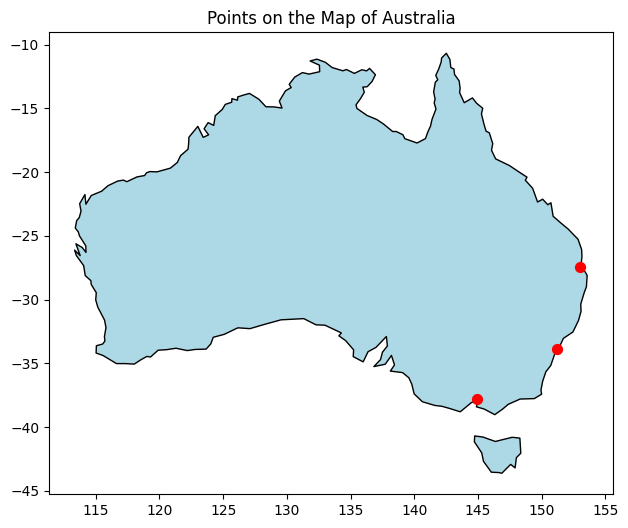

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame with some sample points (latitude, longitude)
data = {'city': ['Sydney', 'Melbourne', 'Brisbane'],
        'latitude': [-33.8688, -37.8136, -27.4698],
        'longitude': [151.2093, 144.9631, 153.0251]}

# Create a geometry column from the latitude and longitude
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]

# Create a GeoDataFrame for the points
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Load the world map from the downloaded shapefile
world = gpd.read_file("earth_data/ne_110m_admin_0_countries.shp")

# Filter for Australia only
australia = world[world['NAME'] == 'Australia']

# Plotting the map of Australia and the points
fig, ax = plt.subplots(figsize=(10, 6))
australia.plot(ax=ax, color='lightblue', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=50)

plt.title('Points on the Map of Australia')
plt.show()


In [17]:
def plot_points_on_map(lat_lon_pairs, map_path="earth_data/ne_110m_admin_0_countries.shp"):
    # Create a GeoDataFrame with the latitude and longitude pairs
    data = {'latitude': [pair[0] for pair in lat_lon_pairs],
            'longitude': [pair[1] for pair in lat_lon_pairs]}
    geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
    gdf = gpd.GeoDataFrame(data, geometry=geometry)

    # Load the world map from the downloaded shapefile
    world = gpd.read_file(map_path)

    # Filter for Australia only
    australia = world[world['NAME'] == 'Australia']

    # Plotting the map of Australia and the points
    fig, ax = plt.subplots(figsize=(10, 6))
    australia.plot(ax=ax, color='lightblue', edgecolor='black')
    gdf.plot(ax=ax, color='red', markersize=50)

    plt.title('Points on the Map of Australia')
    plt.show()
    

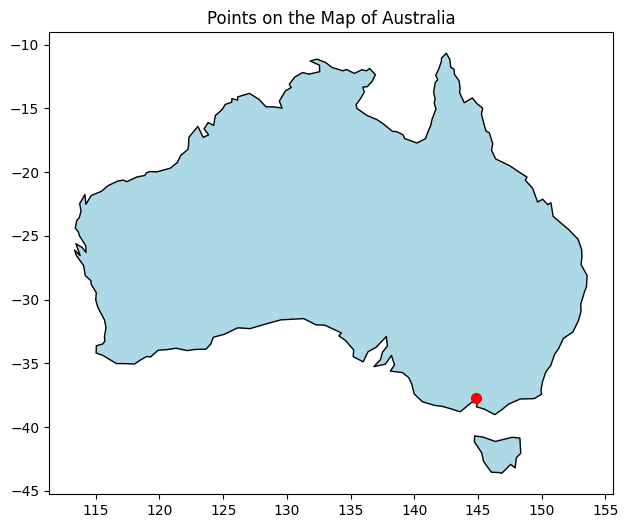

In [18]:
plot_points_on_map([(new_latitude, new_longitude)])

## Zoomed in on Melbourne

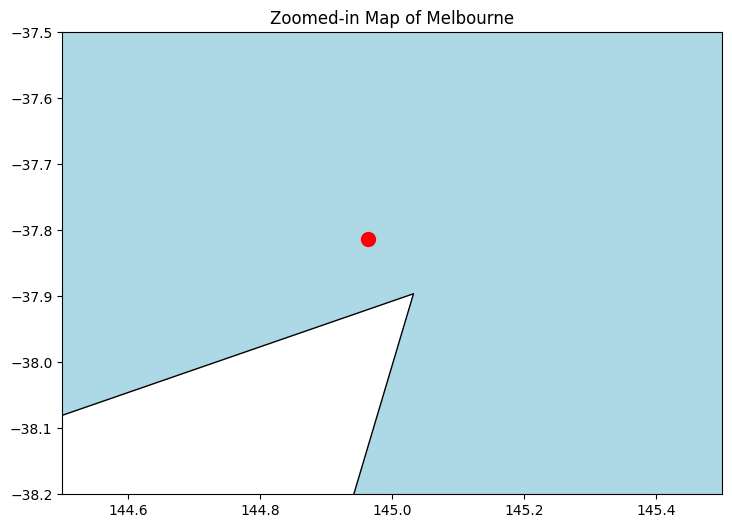

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame with some sample points (latitude, longitude)
data = {'city': ['Melbourne'],
        'latitude': [-37.8136],
        'longitude': [144.9631]}

# Create a geometry column from the latitude and longitude
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]

# Create a GeoDataFrame for the points
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Load the world map from the downloaded shapefile
world = gpd.read_file("earth_data/ne_110m_admin_0_countries.shp")

# Filter for Australia only (you can skip this step if you want to focus just on Melbourne)
australia = world[world['NAME'] == 'Australia']

# Plotting the map of Australia and the points (zoomed to Melbourne)
fig, ax = plt.subplots(figsize=(10, 6))
australia.plot(ax=ax, color='lightblue', edgecolor='black')

# Zoom in on Melbourne by setting axis limits (latitude and longitude boundaries)
ax.set_xlim([144.5, 145.5])  # Longitude range around Melbourne
ax.set_ylim([-38.2, -37.5])  # Latitude range around Melbourne

# Plot the point for Melbourne
gdf.plot(ax=ax, color='red', markersize=100)

plt.title('Zoomed-in Map of Melbourne')
plt.show()


# Prepare for location plots

In [20]:
# define a direction to compass bearing dictionary
direction_to_bearing = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}


melbourne_coords = GeoPoint(-37.8136, 144.9631)

def get_new_location(distance, direction, coords=melbourne_coords):
    # Calculate the bearing in degrees
    bearing = direction_to_bearing[direction]
    # Calculate the new location using the geodesic distance
    new_location = geodesic(kilometers=distance).destination(coords, bearing)
    return new_location.latitude, new_location.longitude

# Test the function with a distance of 19 km and a direction of 'NW'
new_lat, new_lon = get_new_location(19, 'NW')
new_lat, new_lon

(-37.69245620963731, 144.81077199274378)